In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import math

import multiprocessing
from tqdm import tqdm

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.utils.class_weight import compute_sample_weight

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
parameters = ["Age" , "workclass" , "fnlwgt" , "education" , "education-num" , "marital-status" , "occupation" ,
              "relationship" , "race" , "sex" , "capital-gain" , "capital-loss" , "hours-per-week" , "native-country", "Income"]

#get df from appropriate source
df = pd.read_csv("drive/MyDrive/adult.data", index_col=False, names=parameters)
# df = pd.read_csv("adult.data", index_col=False, names=parameters)

#drop observation unit/row with ' Holand-Netherlands' as value due to it only occuring once
# df[df["native-country"] == ' Holand-Netherlands']
df.drop(index=19609, inplace=True)

In [4]:
df["Income"].value_counts(normalize=True)

 <=50K    0.759183
 >50K     0.240817
Name: Income, dtype: float64

In [11]:
df.groupby(["race","sex"])["capital-gain"].mean()

race                 sex    
 Amer-Indian-Eskimo   Female     544.605042
                      Male       675.260417
 Asian-Pac-Islander   Female     778.436416
                      Male      1827.813853
 Black                Female     516.593569
                      Male       702.454430
 Other                Female     254.669725
                      Male      1392.185185
 White                Female     573.676774
                      Male      1368.674455
Name: capital-gain, dtype: float64

In [15]:
df.groupby(["race","sex"])["Income"].value_counts(normalize=True)

race                 sex      Income
 Amer-Indian-Eskimo   Female   <=50K    0.899160
                               >50K     0.100840
                      Male     <=50K    0.875000
                               >50K     0.125000
 Asian-Pac-Islander   Female   <=50K    0.875723
                               >50K     0.124277
                      Male     <=50K    0.663781
                               >50K     0.336219
 Black                Female   <=50K    0.942122
                               >50K     0.057878
                      Male     <=50K    0.810707
                               >50K     0.189293
 Other                Female   <=50K    0.944954
                               >50K     0.055046
                      Male     <=50K    0.882716
                               >50K     0.117284
 White                Female   <=50K    0.881032
                               >50K     0.118968
                      Male     <=50K    0.682435
                               >

# Testing Various Models With All Parameters


*   linear classifier

*   K-Nearest Neighbor
*   Random Forest


*   Gradient Boosting



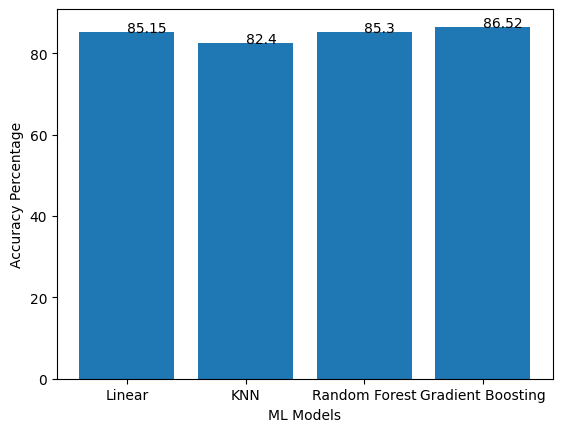

In [ ]:
data = {'Linear': 85.15, 'KNN': 82.40, 'Random Forest' : 85.30, 'Gradient Boosting': 86.52}
names = list(data.keys())
values = list(data.values())
plt.bar(range(len(data)), values, tick_label=names)
plt.xlabel("ML Models")
plt.ylabel("Accuracy Percentage")
for i in range(4):
  plt.annotate(values[i], (i, values[i]))
plt.show()

In [ ]:
X = pd.get_dummies(df[df.columns[:-1]]) #.drop("fnlwgt", axis = 1)
y = df[df.columns[-1]]


pipe = Pipeline([('standardscaler', StandardScaler()), ('linear classifier', LogisticRegression())])
pipe.fit(X, y)
scores = cross_val_score(pipe,
                         X=X,
                         y=y,
                         scoring="accuracy",
                         cv=5)
np.mean(scores)

0.8515095682760354

In [ ]:
X = pd.get_dummies(df[df.columns[:-1]]) #.drop("fnlwgt", axis = 1)
y = df[df.columns[-1]]


pipe = Pipeline([('standardscaler', StandardScaler()), ('KNN classifier', KNeighborsClassifier(n_neighbors=5))])
pipe.fit(X, y)
scores = cross_val_score(pipe,
                         X=X,
                         y=y,
                         scoring="accuracy",
                         cv=5)
np.mean(scores)

0.8239919754141312

In [ ]:
pipe = Pipeline([('standardscaler', StandardScaler()), ('forestclassifier', RandomForestClassifier())])
pipe.fit(X, y)
scores = cross_val_score(pipe,
                         X=X,
                         y=y,
                         scoring="accuracy",
                         cv=5)
np.mean(scores)

0.8529529912014941

In [ ]:
pipe = Pipeline([('standardscaler', StandardScaler()), ('boostedforestclassifier', GradientBoostingClassifier())])
pipe.fit(X, y)
scores = cross_val_score(pipe,
                         X=X,
                         y=y,
                         scoring="accuracy",
                         cv=5)
np.mean(scores)

0.8652376922586503

# Decision Tree Algorithms: Feature Importance
Use built-in feature_importance variable of Decision Tree models here

In [ ]:
X = df[df.columns[:-1]] #.drop("fnlwgt", axis = 1)
y = df[df.columns[-1]]
# Define the column indices of categorical and numerical variables
# categorical_indices = [1,2,4,5,6,7,8,12]  # Replace with your categorical variable column indices
# numeric_indices = [0,3,9,10,11]  # Replace with your numeric variable column indices
categorical_indices = [1,3,5,6,7,8,9,13]  # Replace with your categorical variable column indices
numeric_indices = [0,2,4,10,11,12]  # Replace with your numeric variable column indices

# Create transformers for categorical and numeric variables
categorical_transformer = Pipeline([
    ('onehot', OneHotEncoder())
])

numeric_transformer = Pipeline([
    ('scaler', StandardScaler())
])

# # Combine the transformers using ColumnTransformer
preprocessor = ColumnTransformer([
    ('cat', categorical_transformer, categorical_indices),
    ('num', numeric_transformer, numeric_indices)
])

# Fit and transform the data
X_transformed = preprocessor.fit_transform(X)

In [ ]:
X_transformed
#32561 is the number of rows in dataset
#107 is the number of "parameters" after all the processing;
  #each initial categoric variable is broken down into new parameters
   #for each unique value as some boolean for true or false

<32560x107 sparse matrix of type '<class 'numpy.float64'>'
	with 455840 stored elements in Compressed Sparse Row format>

In [ ]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),  # preprocessor from ColumnTransformer
    ('model', RandomForestClassifier())  # Random Forest model
])

# weights = df["fnlwgt"] / df["fnlwgt"].sum() #fnlwgt represents weights
# pipeline.fit(X, y, model__sample_weight=weights)
pipeline.fit(X,y)
# Apply cross-validation
scores = cross_val_score(pipeline,X=X,y=y, scoring="accuracy", cv=5)  # X and y are the original data
np.mean(scores)

0.8546068796068796

In [ ]:
preprocessor = pipeline.named_steps['preprocessor']
feature_names = preprocessor.get_feature_names_out()

# Get the feature importances from the model step
model = pipeline.named_steps['model']
importances = model.feature_importances_

feature_importances = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)
for feature, importance in feature_importances:
    print(f"{feature}: {importance}")

num__fnlwgt: 0.1628395187116447
num__Age: 0.15140752823582712
num__capital-gain: 0.10076593981747504
num__hours-per-week: 0.08337702737410044
cat__marital-status_ Married-civ-spouse: 0.05899987454357325
num__education-num: 0.058743206665016784
cat__relationship_ Husband: 0.04989424310112446
num__capital-loss: 0.03158978721046223
cat__marital-status_ Never-married: 0.02071446568204516
cat__occupation_ Exec-managerial: 0.017788576962190352
cat__occupation_ Prof-specialty: 0.015691480148103246
cat__education_ Bachelors: 0.012864794514837496
cat__relationship_ Wife: 0.010861561854416106
cat__workclass_ Private: 0.010531780786995367
cat__relationship_ Not-in-family: 0.009851589951777947
cat__workclass_ Self-emp-not-inc: 0.00848079772925214
cat__sex_ Female: 0.008454320489858724
cat__sex_ Male: 0.008444702508882277
cat__education_ Masters: 0.007652514328374295
cat__education_ HS-grad: 0.00760189540007819
cat__relationship_ Own-child: 0.007001868107211616
cat__occupation_ Sales: 0.00670646493

In [ ]:
features = ["Age" , "fnlwgt", "education" , "education-num" , "marital-status" , "occupation" ,
              "relationship" , "race" , "sex" , "capital-gain" , "capital-loss" , "hours-per-week" , "native-country"]

feature_dict = {}
for feature in features:
    feature_dict[feature] = 0
    for feature_importance in feature_importances:
        feature_subkey = feature_importance[0]
        value = feature_importance[1]
        if feature in feature_subkey:
            feature_dict[feature] += value

feature_dict_randomforest = dict(sorted(feature_dict.items(), key=lambda item: item[1], reverse=True))
feature_dict_randomforest

{'fnlwgt': 0.1628395187116447,
 'Age': 0.15140752823582712,
 'education': 0.11398902436798541,
 'capital-gain': 0.10076593981747504,
 'marital-status': 0.08948544329071847,
 'occupation': 0.08417179123418102,
 'relationship': 0.0838869928704199,
 'hours-per-week': 0.08337702737410044,
 'education-num': 0.058743206665016784,
 'capital-loss': 0.03158978721046223,
 'native-country': 0.023457124945854405,
 'sex': 0.016899022998741,
 'race': 0.01566484215201013}

In [ ]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),  # preprocessor from ColumnTransformer
    ('model', GradientBoostingClassifier())  # Gradient Boosting
])

weights = compute_sample_weight(class_weight="balanced", y=y)
pipeline.fit(X, y, model__sample_weight=weights)
# pipeline.fit(X,y)
# Apply cross-validation
scores = cross_val_score(pipeline,X=X,y=y, scoring="accuracy", cv=5)  # X and y are the original data
np.mean(scores)

0.866031941031941

In [ ]:
preprocessor = pipeline.named_steps['preprocessor']
feature_names = preprocessor.get_feature_names_out()

# Get the feature importances from the model step
model = pipeline.named_steps['model']
importances = model.feature_importances_

feature_importances = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)


features = ["Age" , "fnlwgt", "education" , "education-num" , "marital-status" , "occupation" ,
              "relationship" , "race" , "sex" , "capital-gain" , "capital-loss" , "hours-per-week" , "native-country"]

feature_dict = {}
for feature in features:
    feature_dict[feature] = 0
    for feature_importance in feature_importances:
        feature_subkey = feature_importance[0]
        value = feature_importance[1]
        if feature in feature_subkey:
            feature_dict[feature] += value

feature_dict_gradientboosting = dict(sorted(feature_dict.items(), key=lambda item: item[1], reverse=True))
feature_dict_gradientboosting

{'marital-status': 0.47724230031212334,
 'education': 0.16099694529207081,
 'education-num': 0.1602594986884346,
 'capital-gain': 0.14752337204321228,
 'Age': 0.07987936045177028,
 'hours-per-week': 0.047023228610729766,
 'occupation': 0.035377308746777456,
 'capital-loss': 0.032016082573783314,
 'relationship': 0.007842173874878748,
 'sex': 0.0033301141986667726,
 'fnlwgt': 0.0022302631895299387,
 'native-country': 0.001543704687450221,
 'race': 0.0009353261887867852}

# Getting Best/Worst Variables for Gradient Boosting Model
All percentages here are for accuracy.

Text(0.5, 1.0, 'Best/Worst Accuracy Results for Given Number of Parameters')

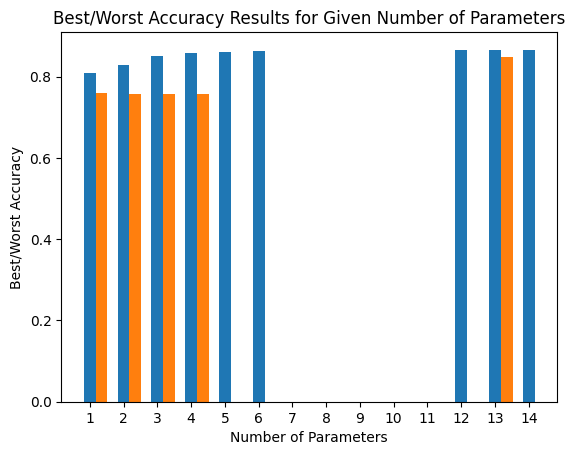

In [ ]:
fig, ax = plt.subplots()
x_labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
bar_width = 0.35 # The width of each bar
x1 = np.arange(len(x_labels)) + 1 # The positions of the best score bars
x2 = x1 + bar_width

best_scores = [0.8096, 0.8290, 0.85, 0.8584, 0.8610, 0.8639, np.nan,
               np.nan, np.nan, np.nan, np.nan, 0.8662, 0.8664, 0.8654]
worst_scores = [0.7588, 0.7570, 0.7568, 0.7566, np.nan, np.nan, np.nan,
                np.nan, np.nan, np.nan, np.nan, np.nan, 0.8475, np.nan]
ax.bar(x1,  best_scores, width=bar_width, label="Best")
ax.bar(x2, worst_scores, width=bar_width, label="Worst")
plt.xlabel("Number of Parameters")
plt.xticks(x1, x_labels)
plt.ylabel("Best/Worst Accuracy")
plt.title("Best/Worst Accuracy Results for Given Number of Parameters")

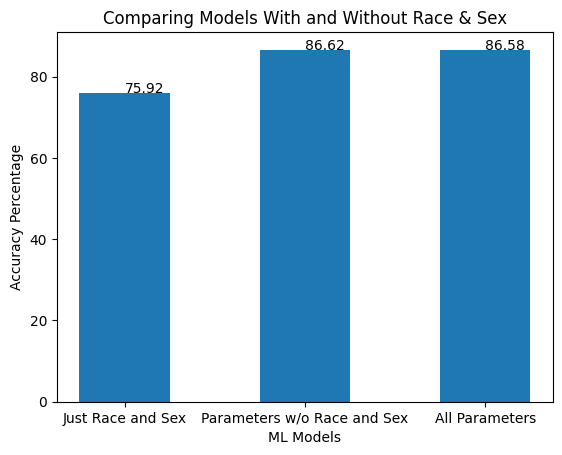

In [ ]:
data = {'Just Race and Sex': 75.92, 'Parameters w/o Race and Sex': 86.62, 'All Parameters': 86.58}
names = list(data.keys())
values = list(data.values())
plt.bar(range(len(data)), values, tick_label=names, width = 0.5)
plt.xlabel("ML Models")
plt.ylabel("Accuracy Percentage")
for i in range(3):
  plt.annotate(values[i], (i, values[i]))
plt.title("Comparing Models With and Without Race & Sex")
plt.show()

## 1 Parameter
Best: 80.96%
<br>Worst: 75.88%

In [ ]:

parameters = ["Age" , "workclass" , "fnlwgt" , "education" , "education-num" , "marital-status" , "occupation" ,
              "relationship" , "race" , "sex" , "capital-gain" , "capital-loss" , "hours-per-week" , "native-country", "Capital_gains?"]

X_parameters = ["Age" , "workclass" , "fnlwgt" , "education" , "education-num" , "marital-status" , "occupation" ,
              "relationship" , "race" , "sex" , "capital-gain" , "capital-loss" , "hours-per-week" , "native-country"]

accuracy_dict_1 = {}
iterations_remaining = math.comb(14, 1)
for i in itertools.combinations(X_parameters, 1):
  parameters = list(i)
  # print(parameters)

  X = pd.get_dummies(df[parameters])
  y = df[df.columns[-1]]


  model = Pipeline([('standardscaler', StandardScaler()), ('boostedforestclassifier', GradientBoostingClassifier())])
  model.fit(X,y)

  scores = cross_val_score(model,
                          X=X,
                          y=y,
                          scoring="accuracy",
                          cv=5)
  accuracy_dict_1[str(parameters)] = np.mean(scores)
  # print(str(parameters) + ": " + str(np.mean(scores)))
  iterations_remaining -= 1
  print(str(iterations_remaining) + " iterations remaining")

13 iterations remaining
12 iterations remaining
11 iterations remaining
10 iterations remaining
9 iterations remaining
8 iterations remaining
7 iterations remaining
6 iterations remaining
5 iterations remaining
4 iterations remaining
3 iterations remaining
2 iterations remaining
1 iterations remaining
0 iterations remaining


In [ ]:
max(accuracy_dict_1, key = accuracy_dict_1.get), min(accuracy_dict_1, key = accuracy_dict_1.get)

In [ ]:
print(accuracy_dict_1["['capital-gain']"])
print(accuracy_dict_1["['fnlwgt']"])

0.8096130221130222
0.7587530712530712


## 2 Parameters
Best: 82.90%
<br>Worst: 75.70%
<br>Race&Gender: 75.92%

In [ ]:
#13 minutes to complete
#looking for the two parameters that gives the best accuracy in Gradient Boosting Classifier
parameters = ["Age" , "workclass" , "fnlwgt" , "education" , "education-num" , "marital-status" , "occupation" ,
              "relationship" , "race" , "sex" , "capital-gain" , "capital-loss" , "hours-per-week" , "native-country", "Capital_gains?"]

X_parameters = ["Age" , "workclass" , "fnlwgt" , "education" , "education-num" , "marital-status" , "occupation" ,
              "relationship" , "race" , "sex" , "capital-gain" , "capital-loss" , "hours-per-week" , "native-country"]

accuracy_dict_2 = {}
iterations_remaining = math.comb(14, 2)
for i in itertools.combinations(X_parameters, 2):
  parameters = list(i)
  # print(parameters)

  X = pd.get_dummies(df[parameters])
  y = df[df.columns[-1]]


  model = Pipeline([('standardscaler', StandardScaler()), ('boostedforestclassifier', GradientBoostingClassifier())])
  model.fit(X,y)

  scores = cross_val_score(model,
                          X=X,
                          y=y,
                          scoring="accuracy",
                          cv=5)
  accuracy_dict_2[str(parameters)] = np.mean(scores)
  # print(str(parameters) + ": " + str(np.mean(scores)))
  iterations_remaining -= 1
  print(str(iterations_remaining) + " iterations remaining")

90 iterations remaining
89 iterations remaining
88 iterations remaining
87 iterations remaining
86 iterations remaining
85 iterations remaining
84 iterations remaining
83 iterations remaining
82 iterations remaining
81 iterations remaining
80 iterations remaining
79 iterations remaining
78 iterations remaining
77 iterations remaining
76 iterations remaining
75 iterations remaining
74 iterations remaining
73 iterations remaining
72 iterations remaining
71 iterations remaining
70 iterations remaining
69 iterations remaining
68 iterations remaining
67 iterations remaining
66 iterations remaining
65 iterations remaining
64 iterations remaining
63 iterations remaining
62 iterations remaining
61 iterations remaining
60 iterations remaining
59 iterations remaining
58 iterations remaining
57 iterations remaining
56 iterations remaining
55 iterations remaining
54 iterations remaining
53 iterations remaining
52 iterations remaining
51 iterations remaining
50 iterations remaining
49 iterations re

In [ ]:
max(accuracy_dict_2, key = accuracy_dict_2.get), min(accuracy_dict_2, key = accuracy_dict_2.get)

("['capital-gain', 'capital-loss']", "['relationship', 'race']")

In [ ]:
accuracy_dict_2["['capital-gain', 'capital-loss']"]

0.828992628992629

In [ ]:
accuracy_dict_2["['relationship', 'race']"]

0.7569717444717445

In [ ]:
accuracy_dict_2["['race', 'sex']"]

0.7591830466830467

## 3 Parameters
Best: 85.00%
<br>Worst: 75.68%

In [ ]:
#60 minutes
#get the pair of 3 parameters that give the best/worst accuracy scores
# define a function that adds key-value pairs to a dictionary based on some input
def add_to_dict(parameters):
  d = {}
  X = pd.get_dummies(df[parameters])
  y = df[df.columns[-1]]
  scores = cross_val_score(model,
                          X=X,
                          y=y,
                          scoring="accuracy",
                          cv=5)
  d[str(parameters)] = np.mean(scores)
  # d['name'] = f'item {str(parameters)}'
  # d['value'] = np.mean(scores)
  return d

X_parameters = ["Age" , "workclass" , "fnlwgt" , "education" , "education-num" , "marital-status" , "occupation" ,
              "relationship" , "race" , "sex" , "capital-gain" , "capital-loss" , "hours-per-week" , "native-country"]

X = pd.get_dummies(df[X_parameters])
y = df[df.columns[-1]]

results = None
model = Pipeline([('standardscaler', StandardScaler()), ('boostedforestclassifier', GradientBoostingClassifier())])
model.fit(X,y)


inputs = []
for parameters in itertools.combinations(X_parameters, 3):
  inputs.append(list(parameters))

# create a pool of worker processes
pool = multiprocessing.Pool(processes=5)

# use pool.map to apply the function to each item in the range
results = list(tqdm(pool.imap(add_to_dict, tqdm(inputs))))

# close and join the pool
pool.close()
pool.join()

accuracy_dict_3 = {k: v for d in results for k, v in d.items()}
# print(accuracy_dict)

In [ ]:
max(accuracy_dict_3, key = accuracy_dict_3.get), min(accuracy_dict_3, key = accuracy_dict_3.get)

("['education-num', 'relationship', 'capital-gain']",
 "['marital-status', 'relationship', 'race']")

In [ ]:
accuracy_dict_3["['education-num', 'relationship', 'capital-gain']"]

0.8497235872235873

In [ ]:
accuracy_dict_3["['marital-status', 'relationship', 'race']"]

0.7568181818181818

## 4 Parameters
Best:  85.84%
<br>Worst: 75.66%

In [ ]:
#130 minutes
#get the pair of 4 parameters that give the best/worst accuracy scores
# define a function that adds key-value pairs to a dictionary based on some input
def add_to_dict(parameters):
  d = {}
  X = pd.get_dummies(df[parameters])
  y = df[df.columns[-1]]
  scores = cross_val_score(model,
                          X=X,
                          y=y,
                          scoring="accuracy",
                          cv=5)
  d[str(parameters)] = np.mean(scores)
  return d

X_parameters = ["Age" , "workclass" , "fnlwgt" , "education" , "education-num" , "marital-status" , "occupation" ,
              "relationship" , "race" , "sex" , "capital-gain" , "capital-loss" , "hours-per-week" , "native-country"]

X = pd.get_dummies(df[X_parameters])
y = df[df.columns[-1]]

results = None
model = Pipeline([('standardscaler', StandardScaler()), ('boostedforestclassifier', GradientBoostingClassifier())])
model.fit(X,y)


inputs = []
for parameters in itertools.combinations(X_parameters, 4):
  inputs.append(list(parameters))

# create a pool of worker processes
pool = multiprocessing.Pool(processes=5)

# use pool.map to apply the function to each item in the range
results = list(tqdm(pool.imap(add_to_dict, tqdm(inputs))))

# close and join the pool
pool.close()
pool.join()

accuracy_dict_4 = {k: v for d in results for k, v in d.items()}
# print(accuracy_dict_4)

  0%|          | 0/1001 [00:00<?, ?it/s]
0it [00:00, ?it/s]
1it [00:48, 48.50s/it]
4it [00:49,  9.36s/it]
6it [01:18, 11.65s/it]
7it [01:18,  8.98s/it]
9it [01:24,  6.46s/it]
10it [01:27,  5.68s/it]
11it [02:18, 16.72s/it]
16it [02:25,  7.01s/it]
17it [02:27,  6.31s/it]
18it [02:36,  6.66s/it]
19it [02:37,  5.56s/it]
20it [02:52,  7.64s/it]
21it [03:22, 13.11s/it]
27it [03:28,  4.89s/it]
28it [03:33,  5.02s/it]
29it [03:44,  6.00s/it]
30it [04:08,  9.45s/it]
34it [04:11,  4.91s/it]
35it [04:24,  6.09s/it]
36it [04:26,  5.35s/it]
 61%|██████    | 610/1001 [04:58<03:11,  2.04it/s]
38it [04:59, 10.48s/it]
41it [04:59,  5.43s/it]
42it [05:01,  4.74s/it]
43it [05:19,  7.57s/it]
44it [05:32,  8.91s/it]
45it [05:55, 12.29s/it]
50it [05:56,  4.55s/it]
51it [06:23,  8.00s/it]
56it [06:58,  7.53s/it]
60it [07:10,  5.77s/it]
63it [07:34,  6.40s/it]
65it [07:45,  6.25s/it]
66it [07:50,  6.14s/it]
67it [07:51,  5.18s/it]
68it [08:06,  7.02s/it]
69it [08:25,  9.55s/it]
70it [08:30,  8.59s/it]
71it [

{"['Age', 'workclass', 'fnlwgt', 'education']": 0.7948710073710074, "['Age', 'workclass', 'fnlwgt', 'education-num']": 0.797051597051597, "['Age', 'workclass', 'fnlwgt', 'marital-status']": 0.7855036855036854, "['Age', 'workclass', 'fnlwgt', 'occupation']": 0.7876228501228499, "['Age', 'workclass', 'fnlwgt', 'relationship']": 0.7862407862407862, "['Age', 'workclass', 'fnlwgt', 'race']": 0.7648034398034398, "['Age', 'workclass', 'fnlwgt', 'sex']": 0.768396805896806, "['Age', 'workclass', 'fnlwgt', 'capital-gain']": 0.8093058968058967, "['Age', 'workclass', 'fnlwgt', 'capital-loss']": 0.7835073710073711, "['Age', 'workclass', 'fnlwgt', 'hours-per-week']": 0.7743857493857493, "['Age', 'workclass', 'fnlwgt', 'native-country']": 0.7649570024570025, "['Age', 'workclass', 'education', 'education-num']": 0.7957923832923834, "['Age', 'workclass', 'education', 'marital-status']": 0.8271191646191646, "['Age', 'workclass', 'education', 'occupation']": 0.8015663390663391, "['Age', 'workclass', 'edu

In [ ]:
max(accuracy_dict_4, key = accuracy_dict_4.get), min(accuracy_dict_4, key = accuracy_dict_4.get)

("['education-num', 'relationship', 'capital-gain', 'capital-loss']",
 "['fnlwgt', 'marital-status', 'relationship', 'race']")

In [ ]:
accuracy_dict_4["['education-num', 'relationship', 'capital-gain', 'capital-loss']"]

0.858384520884521

In [ ]:
accuracy_dict_4["['fnlwgt', 'marital-status', 'relationship', 'race']"]

0.7566031941031941

## 5-6 Parameters
5-param best: 86.10%
<br>6-param best: 86.39%

In [ ]:
X_parameters = ["Age" , "workclass" , "fnlwgt" , "education" , "education-num" , "marital-status" , "occupation" ,
              "relationship" , "race" , "sex" , "capital-gain" , "capital-loss" , "hours-per-week" , "native-country"]

X = pd.get_dummies(df[X_parameters])
y = df[df.columns[-1]]

model = Pipeline([('standardscaler', StandardScaler()), ('boostedforestclassifier', GradientBoostingClassifier())])
model.fit(X,y)

scores = cross_val_score(model,
                        X=pd.get_dummies(df[['occupation','education-num', 'relationship', 'capital-gain', 'capital-loss']]),
                        y=y,
                        scoring="accuracy",
                        cv=5)
np.mean(scores)

0.8610257985257984

In [ ]:
X_parameters = ["Age" , "workclass" , "fnlwgt" , "education" , "education-num" , "marital-status" , "occupation" ,
              "relationship" , "race" , "sex" , "capital-gain" , "capital-loss" , "hours-per-week" , "native-country"]

X = pd.get_dummies(df[X_parameters])
y = df[df.columns[-1]]

model = Pipeline([('standardscaler', StandardScaler()), ('boostedforestclassifier', GradientBoostingClassifier())])
model.fit(X,y)

scores = cross_val_score(model,
                        X=pd.get_dummies(df[['Age', 'occupation', 'education-num', 'relationship', 'capital-gain', 'capital-loss']]),
                        y=y,
                        scoring="accuracy",
                        cv=5)
np.mean(scores)

0.8639127764127764

## 12 Parameters
Best: 86.62%
<br>Without race/gender: 86.62%

In [ ]:
#45 minutes
#get the pair of 3 parameters that give the best/worst accuracy scores
# define a function that adds key-value pairs to a dictionary based on some input
def add_to_dict(parameters):
  d = {}
  X = pd.get_dummies(df[parameters])
  y = df[df.columns[-1]]
  scores = cross_val_score(model,
                          X=X,
                          y=y,
                          scoring="accuracy",
                          cv=5)
  d[str(parameters)] = np.mean(scores)
  return d

X_parameters = ["Age" , "workclass" , "fnlwgt" , "education" , "education-num" , "marital-status" , "occupation" ,
              "relationship" , "race" , "sex" , "capital-gain" , "capital-loss" , "hours-per-week" , "native-country"]

X = pd.get_dummies(df[X_parameters])
y = df[df.columns[-1]]

results = None
model = Pipeline([('standardscaler', StandardScaler()), ('boostedforestclassifier', GradientBoostingClassifier())])
model.fit(X,y)


inputs = []
for parameters in itertools.combinations(X_parameters, 12):
  inputs.append(list(parameters))

# create a pool of worker processes
pool = multiprocessing.Pool(processes=5)

# use pool.map to apply the function to each item in the range
results = list(tqdm(pool.imap(add_to_dict, tqdm(inputs))))

# close and join the pool
pool.close()
pool.join()

accuracy_dict_12 = {k: v for d in results for k, v in d.items()}

In [ ]:
max(accuracy_dict_12, key = accuracy_dict_12.get)

"['Age', 'workclass', 'fnlwgt', 'education-num', 'marital-status', 'occupation', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']"

In [ ]:
accuracy_dict_12["['Age', 'workclass', 'fnlwgt', 'education-num', 'marital-status', 'occupation', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']"]

0.8662162162162161

In [ ]:
accuracy_dict_12["['Age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']"]

0.8661855036855037

## 13 Parameters
Best: 86.64% accuracy
<br>Worst: 84.75% accuracy

In [ ]:
#60 minutes
#get the pair of 3 parameters that give the best/worst accuracy scores
# define a function that adds key-value pairs to a dictionary based on some input
def add_to_dict(parameters):
  d = {}
  X = pd.get_dummies(df[parameters])
  y = df[df.columns[-1]]
  scores = cross_val_score(model,
                          X=X,
                          y=y,
                          scoring="accuracy",
                          cv=5)
  d[str(parameters)] = np.mean(scores)
  return d

X_parameters = ["Age" , "workclass" , "fnlwgt" , "education" , "education-num" , "marital-status" , "occupation" ,
              "relationship" , "race" , "sex" , "capital-gain" , "capital-loss" , "hours-per-week" , "native-country"]

X = pd.get_dummies(df[X_parameters])
y = df[df.columns[-1]]

results = None
model = Pipeline([('standardscaler', StandardScaler()), ('boostedforestclassifier', GradientBoostingClassifier())])
model.fit(X,y)


inputs = []
for parameters in itertools.combinations(X_parameters, 13):
  inputs.append(list(parameters))

# create a pool of worker processes
pool = multiprocessing.Pool(processes=5)

# use pool.map to apply the function to each item in the range
results = list(tqdm(pool.imap(add_to_dict, tqdm(inputs))))

# close and join the pool
pool.close()
pool.join()

accuracy_dict_13 = {k: v for d in results for k, v in d.items()}

100%|██████████| 14/14 [00:00<00:00, 403.38it/s]

1it [01:34, 94.60s/it]
2it [01:56, 51.68s/it]
3it [02:01, 30.59s/it]
4it [02:02, 18.63s/it]
6it [03:30, 32.13s/it]
7it [03:44, 27.17s/it]
9it [03:49, 16.28s/it]
10it [03:54, 13.75s/it]
11it [04:56, 25.85s/it]
12it [04:59, 19.76s/it]
13it [05:04, 15.76s/it]
14it [05:05, 21.82s/it]


In [ ]:
max(accuracy_dict_13, key = accuracy_dict_13.get), min(accuracy_dict_13, key = accuracy_dict_13.get)

("['Age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']",
 "['Age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-loss', 'hours-per-week', 'native-country']")

In [ ]:
accuracy_dict_13["['Age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']"]

0.8664619164619165

In [ ]:
accuracy_dict_13["['Age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-loss', 'hours-per-week', 'native-country']"]

0.8475429975429976

## All Parameters
86.58% accuracy

In [ ]:
X_parameters = ["Age" , "workclass" , "fnlwgt" , "education" , "education-num" , "marital-status" , "occupation" ,
              "relationship" , "race" , "sex" , "capital-gain" , "capital-loss" , "hours-per-week" , "native-country"]

X = pd.get_dummies(df[X_parameters])
y = df[df.columns[-1]]

model = Pipeline([('standardscaler', StandardScaler()), ('boostedforestclassifier', GradientBoostingClassifier())])
model.fit(X,y)

scores = cross_val_score(model,
                        X=pd.get_dummies(df[X_parameters]),
                        y=y,
                        scoring="accuracy",
                        cv=5)
np.mean(scores)

0.866031941031941

# Test Cases
Use prediction function of model to test role of race and then capital-gains which has been shown to be the most important parameter when determining income for this dataset.

In [ ]:
X_parameters = ["Age" , "workclass" , "fnlwgt" , "education" , "education-num" , "marital-status" , "occupation" ,
              "relationship" , "race" , "sex" , "capital-gain" , "capital-loss" , "hours-per-week" , "native-country"]

X = pd.get_dummies(df[X_parameters])
y = df[df.columns[-1]]

model = Pipeline([('standardscaler', StandardScaler()), ('boostedforestclassifier', GradientBoostingClassifier())])
model.fit(X,y)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('boostedforestclassifier', GradientBoostingClassifier())])

In [ ]:
X.columns
white_dude = list(df.loc[1])[:-1]
white_dude_dict = dict(X.loc[1])


black_dude_dict = white_dude_dict.copy()
black_dude_dict["race_ White"] = 0
black_dude_dict["race_ Black"] = 1

rich_black_dude_dict = black_dude_dict.copy()
rich_black_dude_dict["capital-gain"] = 25000

In [ ]:
white_dude_dict

{'Age': 50,
 'fnlwgt': 83311,
 'education-num': 13,
 'capital-gain': 0,
 'capital-loss': 0,
 'hours-per-week': 13,
 'workclass_ ?': 0,
 'workclass_ Federal-gov': 0,
 'workclass_ Local-gov': 0,
 'workclass_ Never-worked': 0,
 'workclass_ Private': 0,
 'workclass_ Self-emp-inc': 0,
 'workclass_ Self-emp-not-inc': 1,
 'workclass_ State-gov': 0,
 'workclass_ Without-pay': 0,
 'education_ 10th': 0,
 'education_ 11th': 0,
 'education_ 12th': 0,
 'education_ 1st-4th': 0,
 'education_ 5th-6th': 0,
 'education_ 7th-8th': 0,
 'education_ 9th': 0,
 'education_ Assoc-acdm': 0,
 'education_ Assoc-voc': 0,
 'education_ Bachelors': 1,
 'education_ Doctorate': 0,
 'education_ HS-grad': 0,
 'education_ Masters': 0,
 'education_ Preschool': 0,
 'education_ Prof-school': 0,
 'education_ Some-college': 0,
 'marital-status_ Divorced': 0,
 'marital-status_ Married-AF-spouse': 0,
 'marital-status_ Married-civ-spouse': 1,
 'marital-status_ Married-spouse-absent': 0,
 'marital-status_ Never-married': 0,
 'mari

In [ ]:
test_df = pd.DataFrame(columns = X.columns)
test_df.loc[len(test_df.index)] = white_dude_dict
test_df.loc[len(test_df.index)] = black_dude_dict
test_df.loc[len(test_df.index)] = rich_black_dude_dict
test_df

,Age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,50,83311,13,25000,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
model.predict(test_df)

array([' <=50K', ' <=50K', ' >50K'], dtype=object)